In [1]:
import tensorflow as tf
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [5]:
import matplotlib.pyplot as plt

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

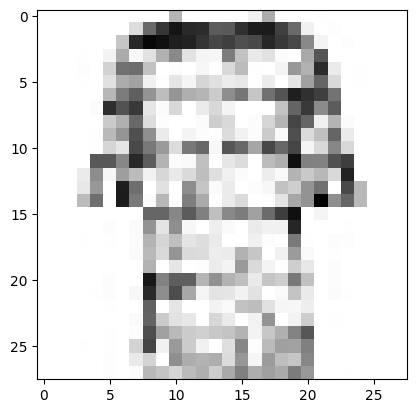

'T-shirt/top'

In [16]:
plt.imshow(X_train[10], cmap="binary")
plt.show()
class_names[y_train[10]]

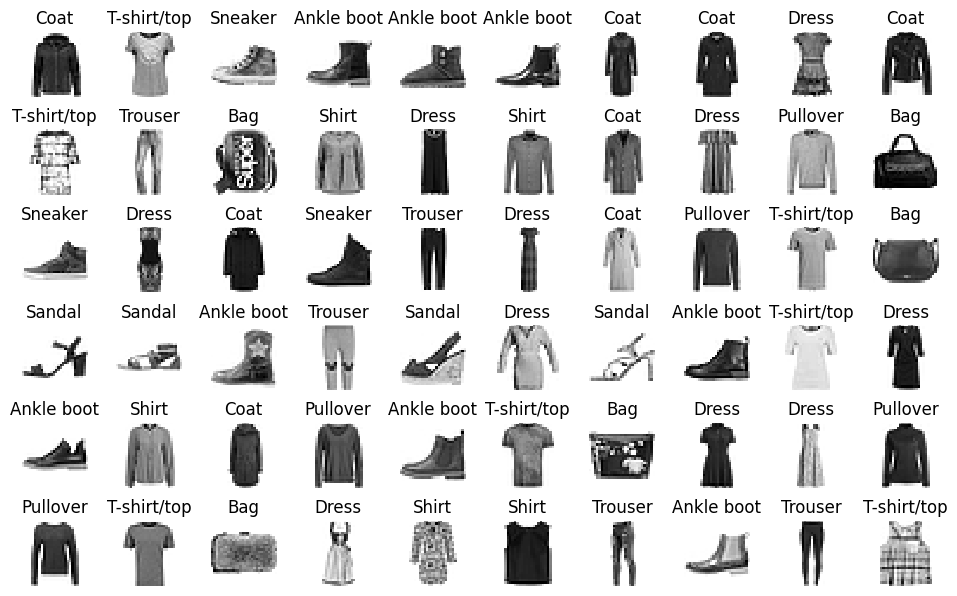

In [17]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 6
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [19]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) 

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]) 

In [69]:
history = model.fit(X_train, y_train, epochs=30,batch_size=32,
                     validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 7.4707e-04 - accuracy: 1.0000 - val_loss: 0.6815 - val_accuracy: 0.9026
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 7.4334e-04 - accuracy: 1.0000 - val_loss: 0.6795 - val_accuracy: 0.9028
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 7.3839e-04 - accuracy: 1.0000 - val_loss: 0.6824 - val_accuracy: 0.9020
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 7.3636e-04 - accuracy: 1.0000 - val_loss: 0.6836 - val_accuracy: 0.9028
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 7.3227e-04 - accuracy: 1.0000 - val_loss: 0.6840 - val_accuracy: 0.9032
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 7.2603e-04 - accuracy: 1.0000 - val_loss: 0.6857 - val_accuracy: 0.9022
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 7.2082e-04 - accuracy: 1.0000 - val_

In [67]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 237.6687 - accuracy: 0.8396


[237.66873168945312, 0.8396000266075134]

In [70]:
y_pred = model.predict(X_test).argmax(axis=-1)

313/313 [==============================] - 0s 892us/step


In [102]:
import numpy as np
import pandas as pd

pred_right = y_pred == y_test
indices = pd.Series(np.arange(y_pred.size))
wrong_indices= indices.loc[~pred_right].reset_index(drop=True)

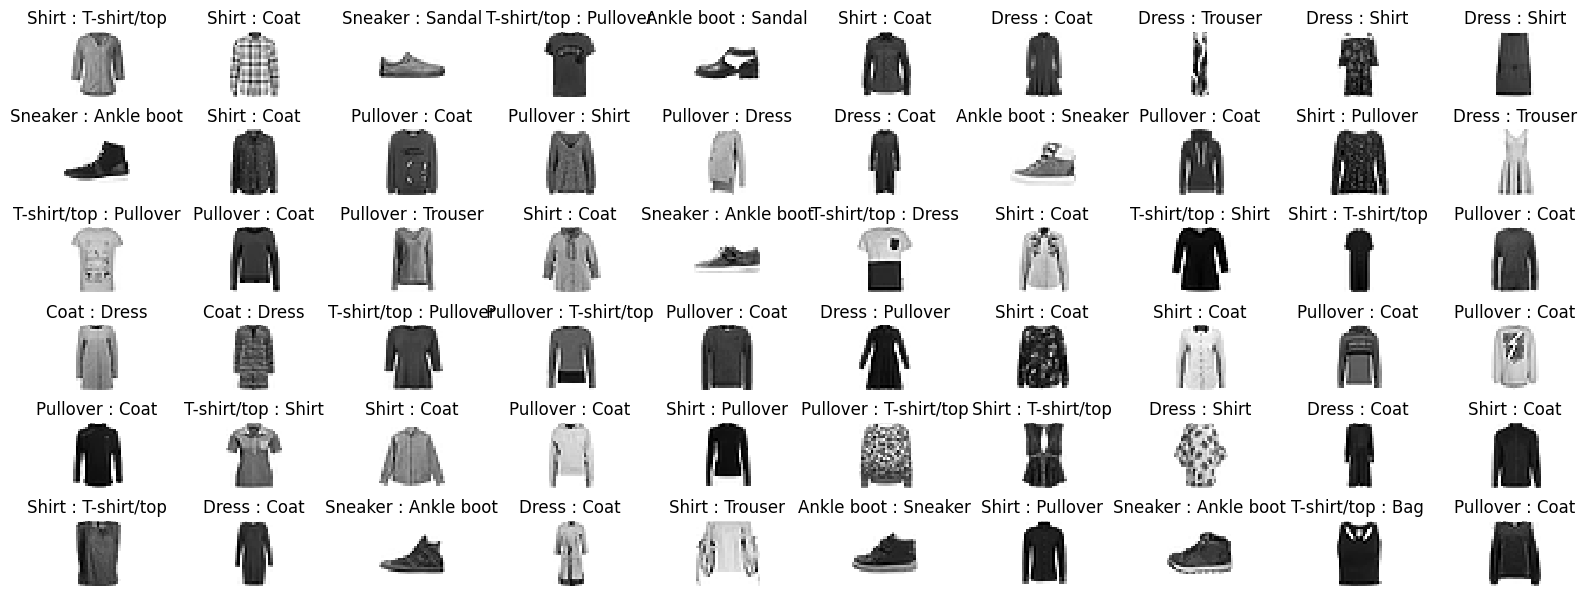

In [108]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 6
n_cols = 10
plt.figure(figsize=(n_cols * 2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[wrong_indices[index]], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[wrong_indices[index]]] + " : " + class_names[y_pred[wrong_indices[index]]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()